<a href="https://colab.research.google.com/github/sBx99/svm-project/blob/master/SupportVectorMachines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

### Resources
1. [StatQuest - Support Vector Machines, Clearly Explained!!!](https://www.youtube.com/watch?v=efR1C6CvhmE)
2. [StatQuest - Polynomial Kernels](https://www.youtube.com/watch?v=Toet3EiSFcM)
3. [StatQuest - Radial Basis Function Kernels](https://www.youtube.com/watch?v=Qc5IyLW_hns&t=97s)
4. **[StatQuest - Support Vector Machine from Start to finish in Python](https://www.youtube.com/watch?v=8A7L0GsBiLQ&t=54s)** - _this is the code used below_ 
5. [Jake VanderPlas - Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)
6. [Dominik Haitz (Matplotblog) - CyberPunk Style Matplotlib Graphs](https://matplotlib.org/matplotblog/posts/matplotlib-cyberpunk-style/)
7. [Support Vector Machine Detailed Analysis - Niraj Verma (Kaggle)](https://www.kaggle.com/nirajvermafcb/support-vector-machine-detail-analysis)
8. [UCI Machine Learning Repository (Dataset)](https://archive.ics.uci.edu/ml/datasets.php)
9. [How To Implement Support Vector Machine With Scikit-Learn - Dhiraj K.](https://blog.paperspace.com/implementing-support-vector-machine-in-python-using-sklearn/)
10. [Scaling Data in Sci-kit Learn](https://scikit-learn.org/stable/modules/preprocessing.html)
11. [Support Vector Machines - Dept. of CS, University of Toronto](http://www.cs.toronto.edu/~mbrubake/teaching/C11/Handouts/SupportVectorMachines.pdf)
12. [Support Vector Machines from Scratch! - Python Engineer](https://www.youtube.com/watch?v=UX0f9BNBcsY)

### SVM Light ???
1. [Information](http://svmlight.joachims.org/)
2. Python Wrapper for SVMlight [1](http://daoudclarke.github.io/pysvmlight/) and [2](https://github.com/daoudclarke/pysvmlight)

## Step 1 - Import all the Required Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
%matplotlib inline

In [3]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

## Step 2 - Import the Data

In [4]:
DATASET = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'

In [5]:
df = pd.read_excel(DATASET, header=1)

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.rename({
    'default payment next month': 'DEFAULT'
    },
    axis='columns',
    inplace=True)

In [8]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
df.drop('ID', axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Identifying Missing Data

Here, when _0_ comes up in the unique values of columns, we can assume it is missing data.

In [10]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [11]:
df['SEX'].unique() # no missing data

array([2, 1])

In [12]:
df['EDUCATION'].unique() # missing data!

array([2, 1, 3, 5, 4, 6, 0])

In [13]:
df['MARRIAGE'].unique() # missing data!

array([1, 2, 3, 0])

## Dealing with Missing Data

In [14]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)]) # rows with missing values

68

In [15]:
len(df) # total rows

30000

We can remove the missing values since they only consist of less than 1% of the missing data (rather than imputing those values).

In [16]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

In [17]:
len(df_no_missing) # has 68 rows less in total

29932

In [18]:
df_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6])

In [19]:
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3])

## Downsampling Data

In [20]:
# splitting into 2 dataframes - people who did a default and people who didn't
df_no_default = df_no_missing[df_no_missing['DEFAULT'] == 0]
df_default = df_no_missing[df_no_missing['DEFAULT'] == 1]

In [21]:
# downsample the dataset that didn't default
df_no_default_downsampled  = resample(df_no_default, 
                                      replace=False, 
                                      n_samples=1000,
                                      random_state=42)
len(df_no_default_downsampled)

1000

In [22]:
# downsample the dataset that did default
df_default_downsampled  = resample(df_default, 
                                    replace=False, 
                                    n_samples=1000,
                                    random_state=42)
len(df_default_downsampled)

1000

In [23]:
# merge the downsampled datasets into one dataset
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
len(df_downsample)

2000

## Formatting the Data
### 1. Split Data into Dependent and Independent Variables

In [24]:
# original features
X = df_downsample.drop('DEFAULT', axis=1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,-2,100143,50456,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,0,165027,168990,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,0,25781,26000,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,-2,355,975,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,0,76433,78472,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [25]:
# target
y = df_downsample['DEFAULT']
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

### 2. One-Hot Encoding
This is to modify and convert the categorical data so that it can be operated on waaay better!

In [26]:
pd.get_dummies(X, columns=['MARRIAGE']).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
641,130000,2,3,28,0,0,0,0,-2,-2,100143,50456,50000,0,0,0,2500,1000,0,0,0,0,1,0,0
4678,170000,1,3,29,0,0,0,0,0,0,165027,168990,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300,1,0,0
16004,180000,2,2,29,0,0,0,0,0,0,25781,26000,26310,26662,26166,26176,1800,1800,1500,1056,950,1000,1,0,0
22974,210000,2,2,32,-2,-2,-2,-2,-2,-2,355,975,410,0,0,0,979,412,0,0,0,0,0,1,0
17535,190000,2,3,45,0,0,0,0,0,0,76433,78472,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000,1,0,0


In [27]:
X_encoded = pd.get_dummies(X, columns=['SEX',
                                       'EDUCATION',
                                       'MARRIAGE',
                                       'PAY_0',
                                       'PAY_2',
                                       'PAY_3',
                                       'PAY_4',
                                       'PAY_5',
                                       'PAY_6'])
X_encoded.head() # waaay more columns but each denote the previous integer value given to each person

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,...,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_7,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,1500,1056,950,1000,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### 3. Centering and Scaling

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [29]:
# use the mean and standard deviation from the training dataset to center and scale the testing data
# https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
scaler.mean_

array([1.55080000e+05, 3.57120000e+01, 5.28070427e+04, 5.13907180e+04,
       4.79900680e+04, 4.52364893e+04, 4.09822393e+04, 3.89489933e+04,
       5.30753867e+03, 5.37787067e+03, 4.33789000e+03, 3.59229133e+03,
       3.65660400e+03, 4.49518400e+03, 4.16666667e-01, 5.83333333e-01,
       3.34666667e-01, 4.86666667e-01, 1.66666667e-01, 1.33333333e-03,
       8.66666667e-03, 2.00000000e-03, 4.64000000e-01, 5.20666667e-01,
       1.53333333e-02, 7.53333333e-02, 1.76000000e-01, 4.10666667e-01,
       1.45333333e-01, 1.66666667e-01, 1.93333333e-02, 2.00000000e-03,
       6.66666667e-04, 1.33333333e-03, 6.66666667e-04, 2.00000000e-03,
       1.06666667e-01, 1.86666667e-01, 4.63333333e-01, 6.66666667e-04,
       2.15333333e-01, 2.00000000e-02, 3.33333333e-03, 1.33333333e-03,
       6.66666667e-04, 2.00000000e-03, 1.22666667e-01, 1.72666667e-01,
       4.84000000e-01, 2.00666667e-01, 1.00000000e-02, 4.66666667e-03,
       6.66666667e-04, 2.00000000e-03, 2.66666667e-03, 1.33333333e-01,
      

In [31]:
scaler.scale_

array([1.26371649e+05, 9.46141582e+00, 7.55773912e+04, 7.29293307e+04,
       6.81220286e+04, 6.55904547e+04, 5.95154944e+04, 5.83638159e+04,
       1.47764565e+04, 1.88084761e+04, 1.46831616e+04, 1.01390009e+04,
       9.94474310e+03, 1.72770670e+04, 4.93006649e-01, 4.93006649e-01,
       4.71873806e-01, 4.99822191e-01, 3.72677996e-01, 3.64904858e-02,
       9.26906444e-02, 4.46766158e-02, 4.98702316e-01, 4.99572706e-01,
       1.22874823e-01, 2.63928441e-01, 3.80820168e-01, 4.91954831e-01,
       3.52436598e-01, 3.72677996e-01, 1.37693702e-01, 4.46766158e-02,
       2.58112809e-02, 3.64904858e-02, 2.58112809e-02, 4.46766158e-02,
       3.08688984e-01, 3.89643712e-01, 4.98653743e-01, 2.58112809e-02,
       4.11053389e-01, 1.40000000e-01, 5.76387216e-02, 3.64904858e-02,
       2.58112809e-02, 4.46766158e-02, 3.28054196e-01, 3.77958845e-01,
       4.99743934e-01, 4.00499133e-01, 9.94987437e-02, 6.81534217e-02,
       2.58112809e-02, 4.46766158e-02, 5.15708789e-02, 3.39934634e-01,
      

In [32]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Build a Preliminary Support Vector Machine

In [33]:
clf = SVC(random_state=42) # Simple Support Vector Classifier
clf.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

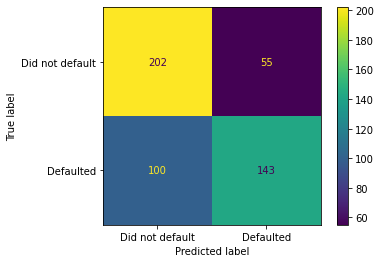

In [34]:
# confusion matrix
plot_confusion_matrix(
    clf,
    X_test_scaled,
    y_test,
    values_format='d',
    display_labels=[
      'Did not default',
      'Defaulted'
    ])

In [35]:
# for the accuracy score
y_pred_initial = clf.predict(X_test_scaled)
y_true_initial = y_test

print('important scores:')
print('accuracy:', accuracy_score(y_true_initial, y_pred_initial) * 100, '%')
print('precision:', precision_score(y_true_initial, y_pred_initial) * 100, '%')
print('recall:', recall_score(y_true_initial, y_pred_initial) * 100, '%')
print('f1 score:', f1_score(y_true_initial, y_pred_initial) * 100, '%')


important scores:
accuracy: 69.0 %
precision: 72.22222222222221 %
recall: 58.8477366255144 %
f1 score: 64.85260770975057 %


these results kinda really suck since we haven't really done all that much.

## Optimizing Paramters (Using Cross Validation and GridSearchCV())

Optimizing  a SVM with an RBF Kernel is all about finding the best value for gamma, and potentially, the regularization parameter C. 

Increasing the accuracy of the test dataset can only be done by finding better parameters, and to do this it might be a good idea to try out some Cross Validation.

In [36]:
# default values - C=1, gamma='scale'
param_grid = [
  {'C': [0.5, 1, 10, 100],
   'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
   'kernel': ['rbf']}
]

In [37]:
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

In [38]:
optimal_params.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [39]:
optimal_params.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

## Creating the Final Support Vector Machine

In [40]:
clf_svm = SVC(C=100, gamma=0.001, kernel='rbf', random_state=42)

In [41]:
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

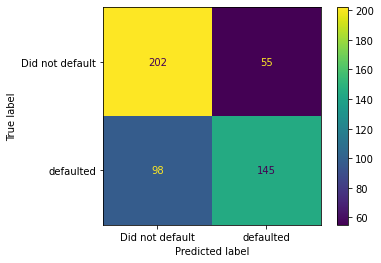

In [42]:
plot_confusion_matrix(
    clf_svm,
    X_test_scaled,
    y_test,
    values_format='d',
    display_labels=['Did not default', 'defaulted']
)

In [43]:
# for the accuracy score
y_pred_new = clf_svm.predict(X_test_scaled)
y_true_new = y_test

print('important scores:')
print('accuracy:', accuracy_score(y_true_new, y_pred_new) * 100, '%')
print('precision:', precision_score(y_true_new, y_pred_new) * 100, '%')
print('recall:', recall_score(y_true_new, y_pred_new) * 100, '%')
print('f1 score:', f1_score(y_true_new, y_pred_new) * 100, '%')


important scores:
accuracy: 69.39999999999999 %
precision: 72.5 %
recall: 59.67078189300411 %
f1 score: 65.46275395033861 %


the test scores are slightly better

In [44]:
len(df_downsample.columns)

24

## Plotting this SVM's Features
There are 24 features (or columns) in X. This means that the hyperplane would consist of 24 dimensions and that would be pretty hard to visualize. Using PCA (Principal Component Analysis), these can be scaled down to make a 2-dimensional graph.*italicised text*

In [45]:
pca = PCA() # by default, PCA centers the data, but it doesn't scale it
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var) + 1)]

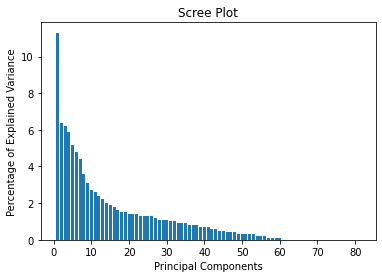

In [46]:
plt.bar(x=range(1, len(per_var) + 1), height=per_var)
plt.tick_params(
    axis='x',
    which='bottom',
    bottom=False,
    top=False,
    labelbottom=False
)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [47]:
# optimizing SVM to fit PC1 and PC2
train_pc1_coords = X_train_pca[:, 0] # X-coords of data after PCA
train_pc2_coords = X_train_pca[:, 1] # Y-coords of data after PCA

# center and scale principal components
pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

# parameter grid
# default values - C=1, gamma='scale'
param_grid = [
  {'C': [0.5, 1, 10, 100],
   'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
   'kernel': ['rbf']}
]

# optimal parameters
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(pca_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [48]:
optimal_params.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [49]:
clf_svm_final = SVC(random_state=42, C=1000, gamma=0.001, kernel='rbf')
clf_svm_final.fit(pca_train_scaled, y_train)

# transform test dataset with PCA
X_test_pca = pca.transform(X_train_scaled)

test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

In [50]:
x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(
    np.arange(start=x_min, stop=x_max, step=0.1),
    np.arange(start=y_min, stop=y_max, step=0.1)
)

In [51]:
Z = clf_svm_final.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

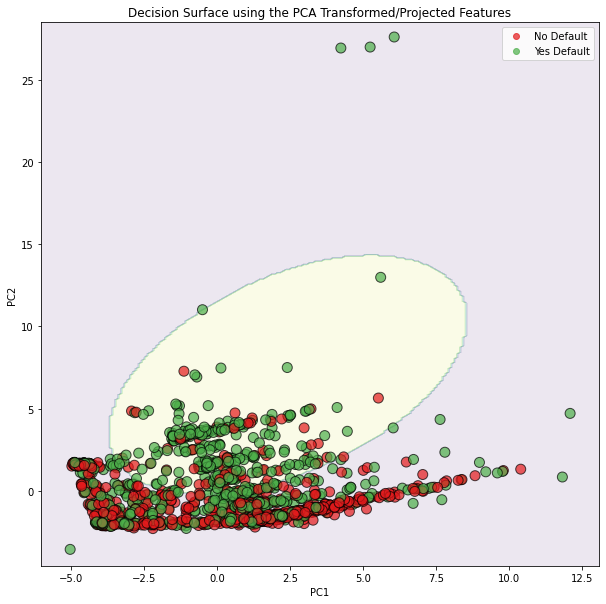

In [52]:
# contour plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(xx, yy, Z, alpha=0.1)
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
scatter = ax.scatter(
    test_pc1_coords,
    test_pc2_coords,
    c=y_train,
    cmap=cmap,
    s=100,
    edgecolors='k',
    alpha=0.7)
legend = ax.legend(
    scatter.legend_elements()[0],
    scatter.legend_elements()[1],
    loc='upper right')
legend.get_texts()[0].set_text('No Default')
legend.get_texts()[1].set_text('Yes Default')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Decision Surface using the PCA Transformed/Projected Features')
plt.show()